# The Most "Fun" Neighborhood in Pittsburgh: A Safety Perspective
## By: Alyssa Hoffecker

In this part of our group assignment, I will be analyzing crime statistics from the City of Pittsburgh. 
We are focusing on the idea of fun. As young adult women, we look for fun in our daily lives, and the city of Pittsburgh provides it. But, as we look to possibly stay here, we have to consider safety as a possible measure for the understanding of a "fun place to live". As safety increases, fun does too, and with an increase in safety, comes an increase in peace of mind that we have in knowing that we can have fun without needing to be too worried of our surroundings.

In [2]:
# Import pandas library for data visualization
import pandas as pd

# Read in the csv file
file = pd.read_csv('DataSet.csv')

In [3]:
# See the raw table of data
file.head()

,_id,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,2802309,16000001.0,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2,2803174,16004547.0,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,3,2801809,16000367.0,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,4,2802315,16000035.0,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,5,2802312,16000024.0,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


## Data Dictionary:

- PK: The automated, unique incident ID number
- CCR: The incident report number
- HIERARCHY: The highest UCR hierarchy (based on all offenses) for the incident
- INCIDENTTIME: Time and date of incident
- INCIDENTLOCATION: Location of incident
- CLEARED_FLAG: Whether or not the incident was cleared/closed
- INCIDENTNEIGHBORHOOD: Neighborhood where incident took place
- INCIDENTZONE: Pittsburgh Police Zone where incident took place
- HIERARCHY_DESC: Description of the highest UCR hierarchy (based on all offenses) for the incident
- OFFENSES: All offenses listed for the incident
- INCIDENTTRACT: Tract number where incident took place
- X: The geocoded X coordinate of the incident location (using county geocoder)
- Y: The geocoded Y coordinate of the incident location (using county geocoder)



First, I want to take this data and just look at overall crimes in each neighborhood. I want to measure the amount of crime versus the neighborhood, to see if there are clear outliers that are safer than the other surorunding neighborhoods.

## Total Crime in ALL Neighborhoods

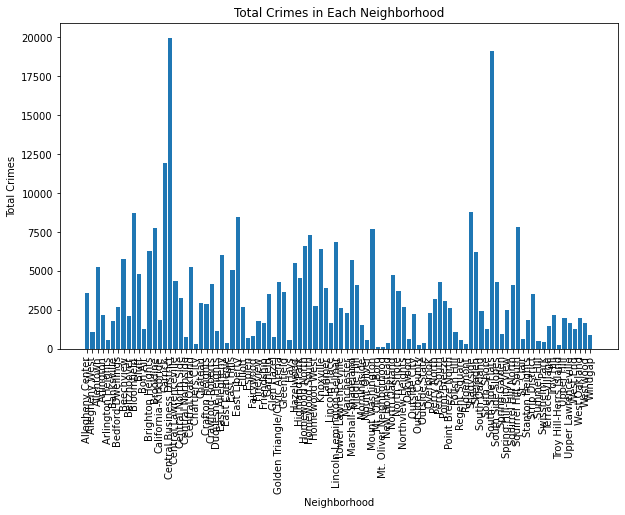

The mean crime rate for all neighborhoods is: 3408.918367346939
The standard deviation for all neighborhoods is: 3377.850459275273


In [4]:
# Group the data by neighborhood and calculate total crimes
crime_by_neighborhood = file.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='total_crimes')

# Calculate statistics
mean_crimes = crime_by_neighborhood['total_crimes'].mean()
std_dev_crimes = crime_by_neighborhood['total_crimes'].std()

# Visualize the data
# Let's see how many crimes occurred in each neighborhood
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(crime_by_neighborhood['INCIDENTNEIGHBORHOOD'], crime_by_neighborhood['total_crimes'])
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.title('Total Crimes in Each Neighborhood')
plt.show()

print("The mean crime rate for all neighborhoods is:", mean_crimes)
print("The standard deviation for all neighborhoods is:", std_dev_crimes)


## Redefining Our Locations
This is too many neighborhoods to identify. We want to make this simpler, so we have chosen 10 neighborhoods to continue analysis of. 
We are learning about: 
- Shadyside
- Central Oakland
- The Business District
- Strip Distict
- Carrick
- South Side Flats
- South Oakland
- North Oakland
- Mount Washington

Now, knowing that we have filtered out the neighborhoods into the specific ones we are looking into, I want to see how the neighborhoods compare in crime for each year. My goal with this is to be able to indentify the safest neighborhood and to learn if this has stayed the same over about 10 years, or if it has recently become more safe due to different city-wide changes.
I am going to create one graph that plots each neighborhood, having a seperate bar for each year. I will be able to see the general "cluster" for each neighborhood, while also comparing the overall shapes of each neighborhood to one another.

## Total Crimes in Each Neighborhood from 2015-2023

<Figure size 864x576 with 0 Axes>

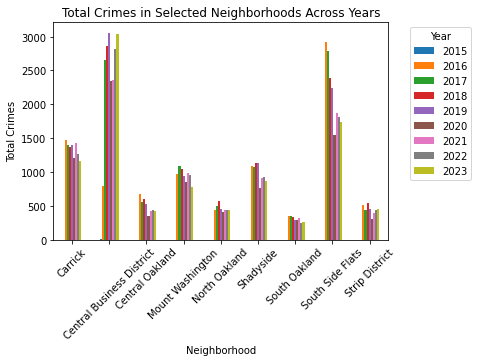

In [23]:


# Filter data to include only the specified neighborhoods
cleaned_data = file[file['INCIDENTNEIGHBORHOOD'].isin(neighborhoods_to_keep)]

# Group by year and neighborhood, and calculate total crimes
crime_by_neighborhood_year = cleaned_data.groupby(['INCIDENTNEIGHBORHOOD', cleaned_data['INCIDENTTIME'].dt.year]).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
crime_by_neighborhood_year.plot(kind='bar', stacked=False)
plt.xlabel('Neighborhood')
plt.ylabel('Total Crimes')
plt.title('Total Crimes in Selected Neighborhoods Across Years')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


I like this plot a little better, as we can start to see some averages amongst the neighborhoods. 
I have collected this information:
- Central Oakland, South Oakland, North Oakland and the Strip District have the lowest crime
- The crime in South Side Flats is significantly less than it was about 10 years ago
- The smallest variation of crime rates is in South Oakland

Let's see how the crime rate looked over the years in each neigborhood. This will allow us to see if there are any trends in crime increasing or decreasing. If there is a trend of an increase in crime, that would be somewhere to not look for in the most "fun" place to live as we want to ensure our safety so that we can have as much fun as possible.
Let's take a look at each neighborhood throughout the years a bit closer, so that we can get more precise anaylsis. The smaller bars on the graph don't give us specific data, so let's visualize it in an easier way to see those statistics.

## The Crime Rate of Each Neighborhood from 2015-2023

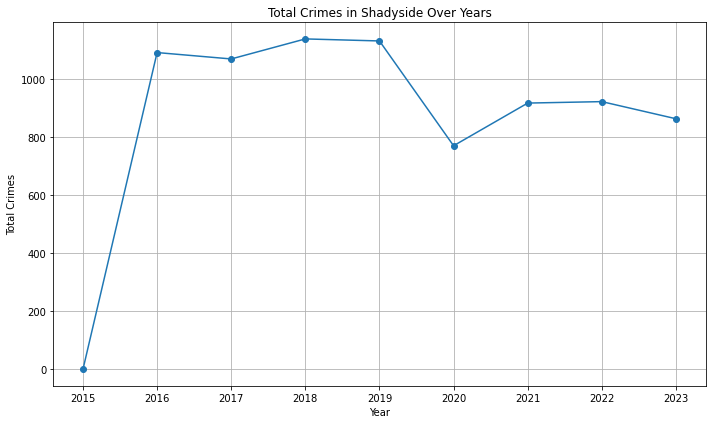

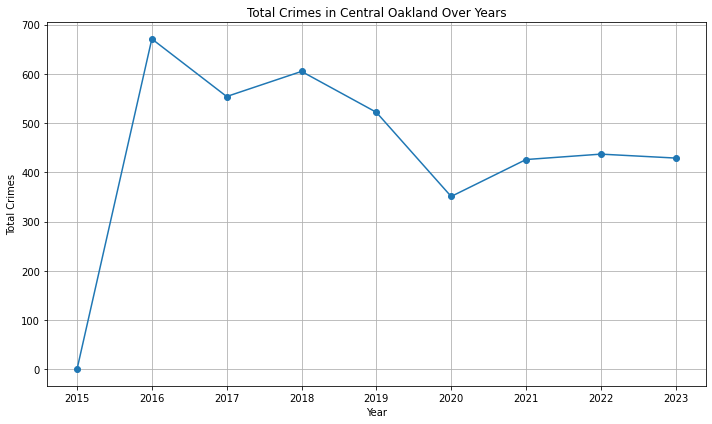

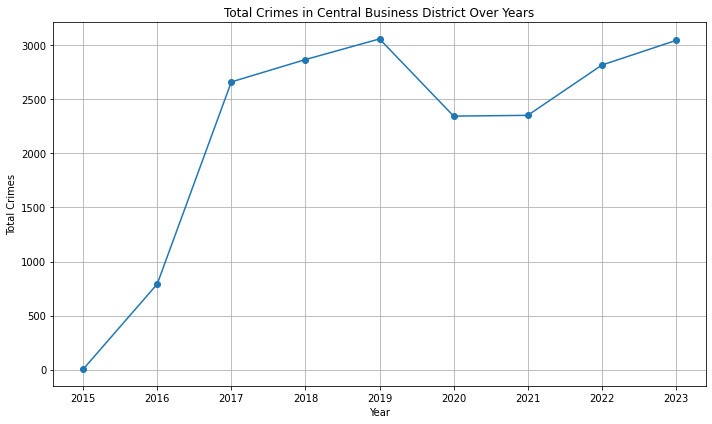

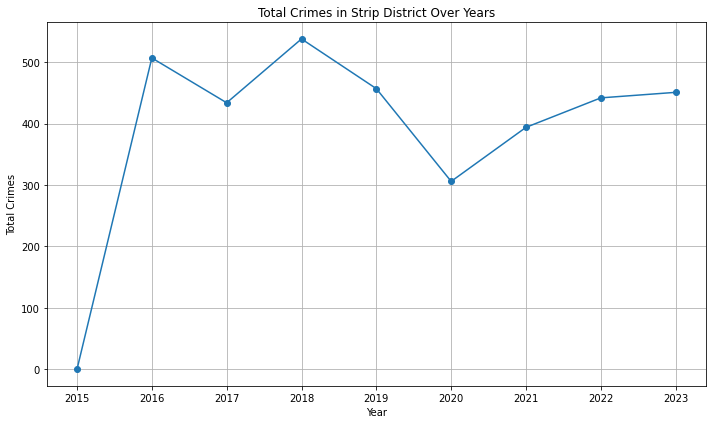

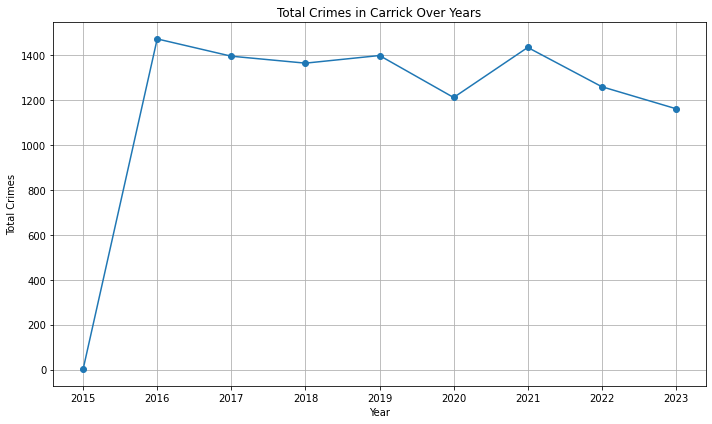

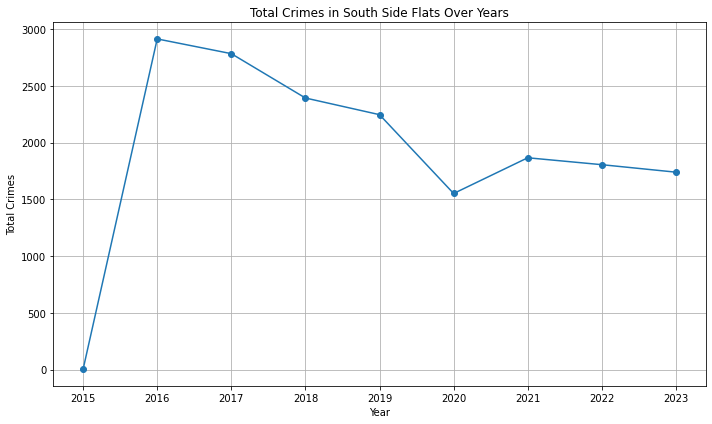

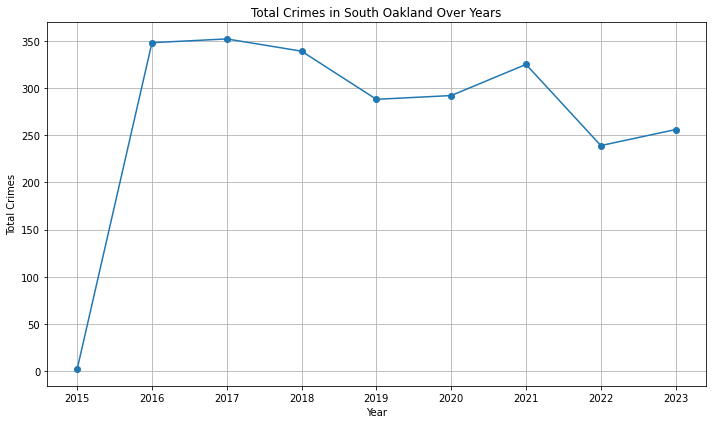

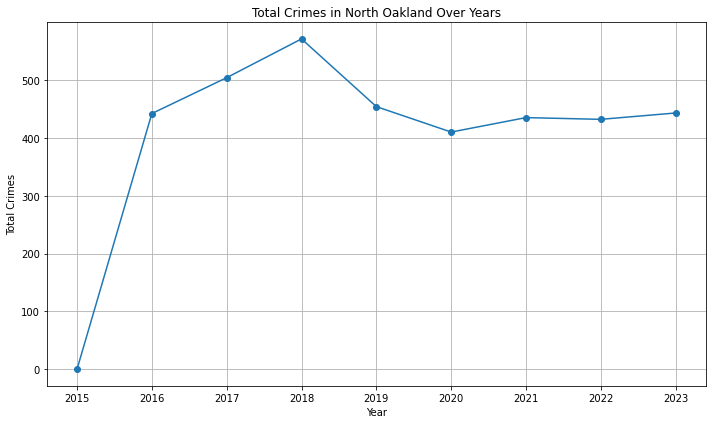

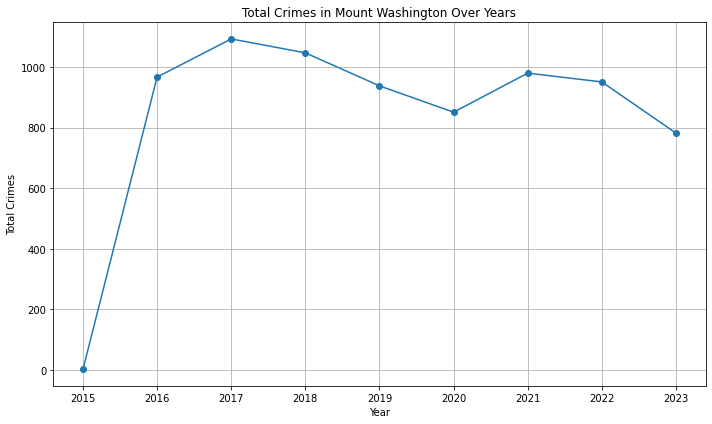

In [24]:
# Group by neighborhood and year, and calculate total crimes
crime_by_neighborhood_year = cleaned_data.groupby(['INCIDENTNEIGHBORHOOD', cleaned_data['INCIDENTTIME'].dt.year]).size().unstack(fill_value=0)

# Plotting each neighborhood's total crimes over years
for neighborhood in neighborhoods_to_keep:
    plt.figure(figsize=(10, 6))
    plt.plot(crime_by_neighborhood_year.loc[neighborhood], marker='o')
    plt.xlabel('Year')
    plt.ylabel('Total Crimes')
    plt.title(f'Total Crimes in {neighborhood} Over Years')
    plt.xticks(crime_by_neighborhood_year.columns)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Shadyside, Central Oakland, Carrick, Southside Flats, South Oakland, North Oakland and Mount Washington have all had decreases in their crime rate. This is good to know, and would constitute those neighborhoods as safer than the others.

I want to take a look at the averages and compare them side by side.
For each neighborhood, I will compute the average number of crimes from 2015-2023 along with the standard deviation. This will let me see the direct averages compared in order to see who has had the lowest crime over the years.

## Average Total Crimes 

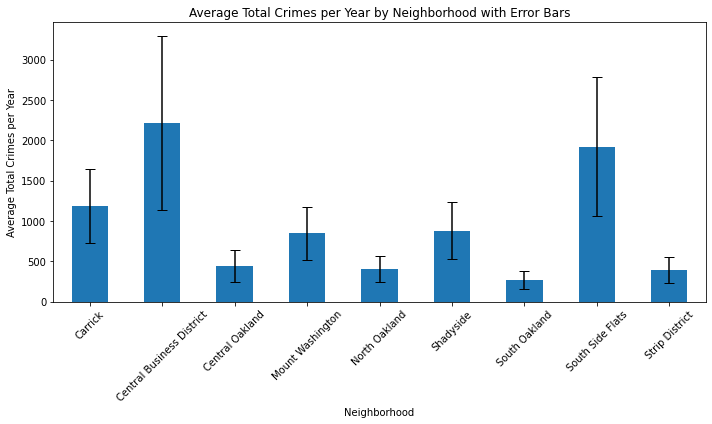

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'file'

# List of neighborhoods to keep
neighborhoods_to_keep = ['Shadyside', 'Central Oakland', 'Central Business District', 
                         'Strip District', 'Carrick', 'South Side Flats', 'South Oakland', 
                         'North Oakland', 'Mount Washington']

# Convert 'INCIDENTTIME' to datetime type
file['INCIDENTTIME'] = pd.to_datetime(file['INCIDENTTIME'])

# Filter data to include only the specified neighborhoods
cleaned_data = file[file['INCIDENTNEIGHBORHOOD'].isin(neighborhoods_to_keep)]

# Group by neighborhood and year, and calculate total crimes
crime_by_neighborhood_year = cleaned_data.groupby(['INCIDENTNEIGHBORHOOD', cleaned_data['INCIDENTTIME'].dt.year]).size().unstack(fill_value=0)

# Calculate average number of crimes per year for each neighborhood
neighborhood_avg_year = crime_by_neighborhood_year.mean(axis=1)

# Plot bar chart to compare average number of crimes per year across neighborhoods
plt.figure(figsize=(10, 6))
neighborhood_avg_year.plot(kind='bar', yerr=crime_by_neighborhood_year.std(axis=1), capsize=5)
plt.xlabel('Neighborhood')
plt.ylabel('Average Total Crimes per Year')
plt.title('Average Total Crimes per Year by Neighborhood with Error Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From this plot, I know that Central Oakland, North Oakland, South Oakland and the Strip District have had the lowest average crime rate between 2015-2023. These findings were also consistent with previous analysis done on the data. 
I do notice that this could be a bit skewed as I have not taken into consideration the population of each neighborhood. To do this, I found another dataset that provides population figures for the neighborhoods in Pittsburgh. Using this new data, I will normalize the crime rate averages by diving each average by the total population of the neighborhood.

In [25]:
file2 = pd.read_csv('Neighbors.csv')

In [16]:
file2.head()

,_id,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio,2010_Any_other_single_race_alone_Popualtion,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_pop,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,1,Allegheny Center,933,896,381,453,4,56,1,1,...,486,441,302,-63,4,179,0,19,45,23
1,2,Allegheny West,462,448,354,84,1,7,0,2,...,78,45,72,-52,0,9,1,15,33,28
2,3,Allentown,2500,2384,1485,878,9,1,0,11,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,4,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,...,-73,-153,-246,44,-4,9,0,44,80,39
4,5,Banksville,4144,4053,3651,169,2,211,0,20,...,-17,-197,-460,25,5,174,2,57,180,102


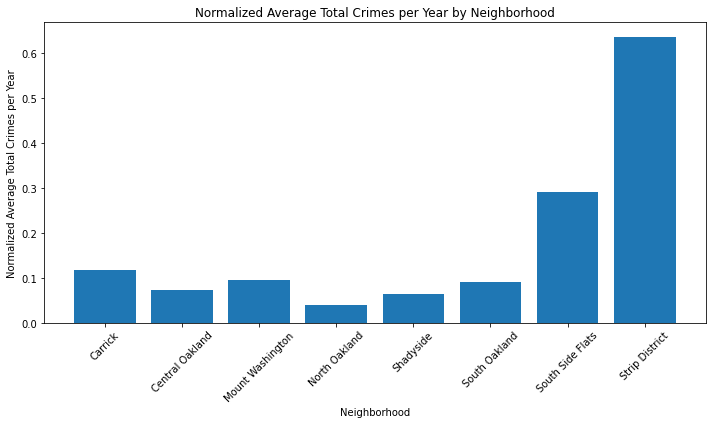

In [19]:
# Filter the data to include only the specific neighborhoods
cleaned_file2 = file2[file2['Neighborhood'].isin(neighborhoods_to_keep)]


# Merge population data with average total crimes per year DataFrame
merged_data = pd.merge(neighborhood_avg_year.reset_index(), cleaned_file2[['Neighborhood', '2010_Total_Population']], left_on='INCIDENTNEIGHBORHOOD', right_on='Neighborhood')

# Normalize the average total crimes by population
merged_data['normalized_avg_crimes'] = merged_data[0] / merged_data['2010_Total_Population']

# Plot bar chart to compare normalized average total crimes per year across neighborhoods
plt.figure(figsize=(10, 6))
plt.bar(merged_data['Neighborhood'], merged_data['normalized_avg_crimes'])
plt.xlabel('Neighborhood')
plt.ylabel('Normalized Average Total Crimes per Year')
plt.title('Normalized Average Total Crimes per Year by Neighborhood')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



These observations were surprising, especially seeing the Strip District have such a high crime rate in relation to the population. While I thought this would take it off of the most "fun" places to live list, I had to do a little digging to understand why this could be the case. 
From the data, The Strip only had about 600 people living there in 2010, so not a large population. Another idea is that this is where many bars and shops are, which would being people into their area more. Especially with the bars, this could correlate with the high crime rate per person as there are an influx of people committing crimes in relation to the population. 
Although this representation of the data shows the Strip District as a high crime rate neighborhood, I will still keep it on the list for the reasons given above. 

The final list of the most fun neighborhoods in Pittsburgh, analyzed by crime rate is:
- Central Oakland
- North Oakland
- South Oakland
- The Strip District

Alyssa Hoffecker:
In my conclusion, I would choose the Strip District as the most "fun" nieghborhood. With both of the other submetrics taken into account, while there is a higher crime rate in the area than other places, there are the majority resturants, bars, and young people living there, which would make it a suitable neighborhood for anyone wanting to find a fun place. In comparison to my favorite area, Lawrenceville, which we did not include in our analysis. I think that the Strip has more businesses and fun activites to do than Lawrenceville because it is a smaller area. 